˙ 최건호, 『파이토치 첫걸음』, 한빛미디어 Ch04 ANN 부분을 토대로 학습합니다

In [0]:
# 필요 모듈 import
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [0]:
data = 1000
epochs = 10000
noise = init.normal_(torch.Tensor(data, 1), std=1)
x = init.uniform_(torch.Tensor(data, 1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [0]:
model = nn.Sequential( # nn.Sequential 클래스는 nn.Linear같은 모듈들을 인수로 받아서 순서대로 정렬, 입력값이 들어오면 순서대로 모듈 실행해 결과값 리턴
    nn.Linear(1, 6),
    nn.ReLU(),
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
) # 깊이가 길어질수록 하나하나 실행하는 것보다 묶어서 연산하는 것이 편리

In [0]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

In [0]:
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step() # model.params에서 리턴되는 변수의 기울기에 학습률 0.01을 곱해서 빼줌

  loss_array.append(loss)

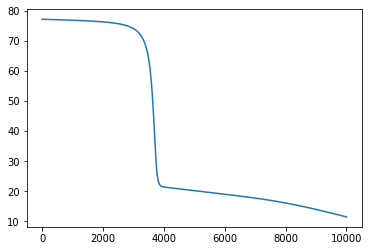

In [0]:
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()